In [69]:
# importing libraries
import numpy as np
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display 
import librosa
import librosa.display
import essentia
import essentia.standard as es
np.set_printoptions(threshold='nan')

In [70]:
# initialising STFT params
sr = 44100
N = 2**15 #FFT size
M = N     #window size
H = M/4  #hop size
W = np.hanning(M)

tracks = ['myalgo_mix', 'human_mix','pedro_mix']
track = [[],[],[]]
m1 = [[],[],[]]
m2 = [[],[],[]]
a1 = [[],[],[]]
a2 = [[],[],[]]

for i in range(0,len(tracks)):
    
    track[i],sr = librosa.load(tracks[i]+'.wav', sr = sr, mono = False)
    stft1 = librosa.stft(y = track[i][0], n_fft = N,win_length=M, hop_length=H, window = 'hann')  
    stft2 = librosa.stft(y = track[i][1], n_fft = N,win_length=M, hop_length=H, window = 'hann') 
    mL,p1 = librosa.magphase(stft1)
    mR,p2 = librosa.magphase(stft2)
    m1[i] = mL/np.max(mL)
    m2[i] = mR/np.max(mR)

    aL, aR = np.average(m1[i],axis=1),np.average(m2[i],axis=1) 
    a1[i],a2[i] = aL/np.max(aL), aR/np.max(aR)   
    


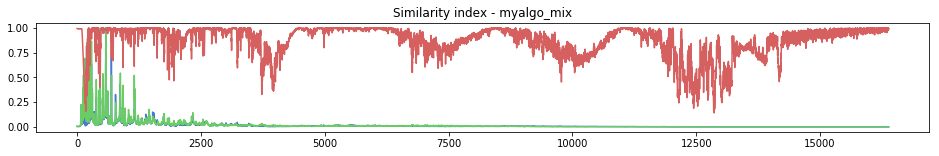

Overall similarity index =  0.87652564


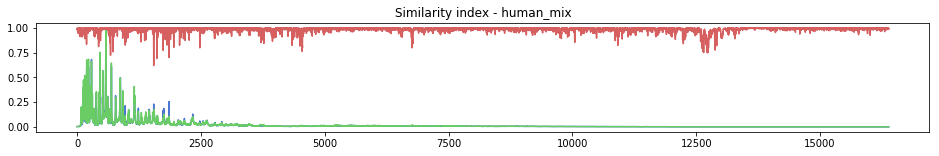

Overall similarity index =  0.98693365


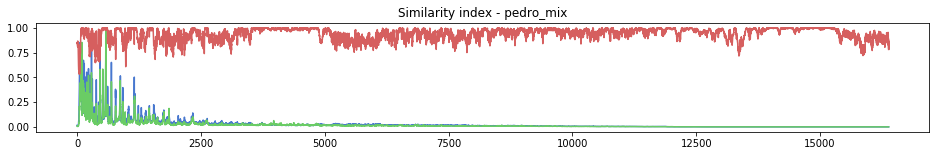

Overall similarity index =  0.9412135


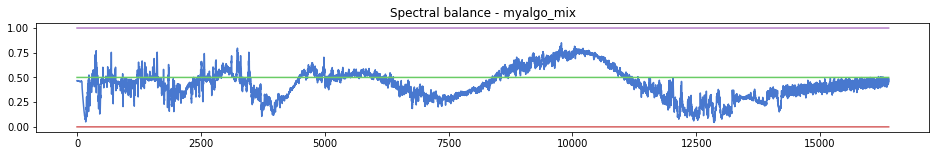

Overall spectral balance =  0.43277428


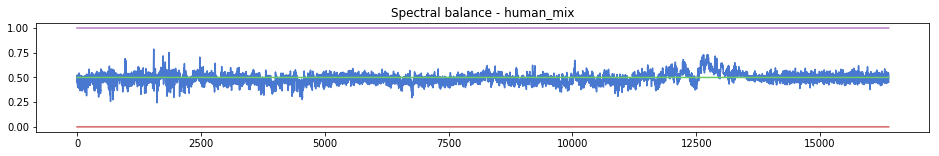

Overall spectral balance =  0.48832446


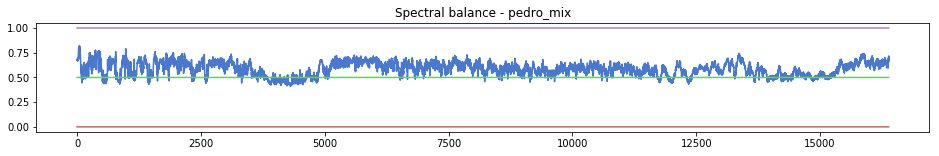

Overall spectral balance =  0.586513


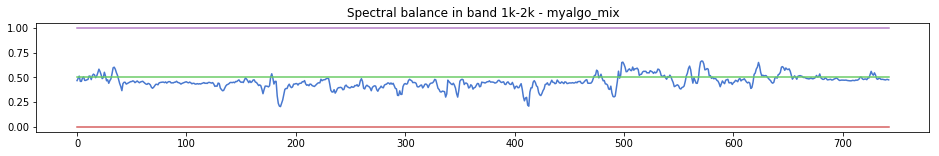

Spectral Balance across bands =  [0.4516581, 0.4566905, 0.45467702, 0.42059574, 0.43358546]


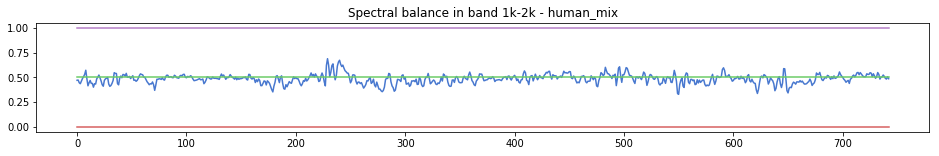

Spectral Balance across bands =  [0.46411383, 0.48523048, 0.48932177, 0.46979633, 0.49877644]


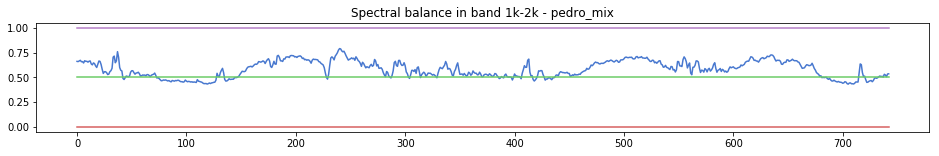

Spectral Balance across bands =  [0.6058288, 0.58354604, 0.61386484, 0.58247143, 0.5738668]


In [92]:
def coh(mx, my):
    return np.multiply(mx,my)
def simfn(s1,s2):
    return 2.0 * np.divide (np.abs(coh(s1,s2)) , np.add(coh(s1,s1),coh(s2,s2)))
def smfn(s1,s2):
    return np.square(s1)-np.square(s2)
def smbfn(s1,s2):
    return np.clip(np.sign(np.square(s1) - np.square(s2)),0,1)

for i in range(0,len(tracks)):

    sim = simfn(a1[i],a2[i])
    plt.figure(figsize=(16,2))
    plt.title("Similarity index - "+tracks[i])
    plt.plot(a1[i])
    plt.plot(a2[i])
    plt.plot(sim)
    plt.show()
    print 'Overall similarity index = ',np.average(sim)
    
for i in range(0,len(tracks)):  
    spat = np.arctan(np.divide(a1[i],a2[i]))/(np.pi/2)
    plt.figure(figsize=(16,2))
    plt.title("Spectral balance - "+tracks[i])
    plt.plot(np.abs(spat))
    plt.plot(0.5*np.ones(np.size(spat)))
    plt.plot(0*np.ones(np.size(spat)))
    plt.plot(1*np.ones(np.size(spat)))
    plt.show()
    print 'Overall spectral balance = ',np.average(spat)
    
for i in range(0,len(tracks)):    
    
    fc = [500,1000,2000,5000,10000,20000]
    bc = np.multiply(fc, float(N)/sr)
    bc = bc.astype(int)
    mel_bands = [np.arange(bc[0],bc[1]),np.arange(bc[1],bc[2]),np.arange(bc[2],bc[3]), np.arange(bc[3],bc[4]),np.arange(bc[4],bc[5])]
    spat_b = [[],[],[],[],[],[]]
    spat_b_avg = [0,1,2,3,4]

    for j in range(0,5):
        spat_b[j] = np.arctan(np.divide(a1[i][mel_bands[j]],a2[i][mel_bands[j]]))/(np.pi/2)
        spat_b_avg[j] = np.average(np.abs(spat_b[j]))
        
    plt.figure(figsize=(16,2))
    plt.title("Spectral balance in band 1k-2k - "+tracks[i])
    plt.plot(spat_b[1])
    plt.plot(0.5*np.ones(np.size(spat_b[1])))
    plt.plot(0*np.ones(np.size(spat_b[1])))
    plt.plot(1*np.ones(np.size(spat_b[1])))
    plt.show()
    
    print "Spectral Balance across bands = ",spat_b_avg    
        